In [1]:
import pandas as pd

data = pd.read_excel("/home/ashish/projects/TransformDepVars_regression/MPG.xlsx")
data

,MilesperGallon,Weight
0,28.7,2289
1,29.2,2113
2,34.2,2180
3,27.9,2448
4,33.3,2026
5,26.4,2702
6,23.9,2657
7,30.5,2106
8,18.1,3226
9,19.5,3213


Text(0.5, 1.0, 'WEight VS MilesperGAllon')

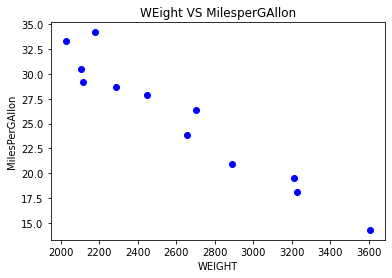

In [2]:
x = data['Weight']
y = data['MilesperGallon']

import matplotlib.pyplot as plt
plt.scatter(x,y,color="blue")
plt.xlabel("WEIGHT")
plt.ylabel("MilesPerGAllon")
plt.title("WEight VS MilesperGAllon")

In [3]:
import statsmodels.api as sm

x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
model.summary()

/home/ashish/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         MilesperGallon   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     144.8
Date:                Sun, 30 Jan 2022   Prob (F-statistic):           2.85e-07
Time:                        03:56:53   Log-Likelihood:                -22.091
No. Observations:                  12   AIC:                             48.18
Df Residuals:                      10   BIC:                             49.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.0957      2.582     21.725      0.000      50.342      61.849
Weight        -0.0116      0.001    -12.032      0.000      -0.014      -0.009
==============================================================================
Omnibus:                        2.266   Durbin-Watson:                   2.213
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                0.951
Skew:                           0.690   Prob(JB):                        0.621
Kurtosis:                       3.025   Cond. No.                     1.43e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## So individual variables and overall model is significant it can be observed from the OLS model.

## Plotting standardized plot and checking condition for significance

In [5]:
residuals = model.resid_pearson
residuals

array([-0.44511273, -1.37252481,  2.08753315,  0.18422536,  0.47540179,
        1.05668329, -0.75350063, -0.64311699, -0.25953343,  0.4879158 ,
        0.12130227, -0.93927307])

In [7]:
y_hat = model.predict(x)
y_hat

0     29.443573
1     31.492839
2     30.712721
3     27.592247
4     32.505829
5     24.634783
6     25.158743
7     31.574344
8     18.533557
9     18.684924
10    14.097361
11    22.469081
dtype: float64

Text(0, 0.5, 'Residuals')

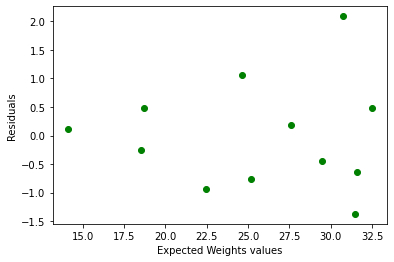

In [9]:
plt.scatter(y_hat,residuals,color="green")
plt.xlabel("Expected Weights values")
plt.ylabel("Residuals")

## It can be easily observed that data points spread has a conical shape not a rectangle so its violating the condition of constant variance.

# RECTIFYING THIS MODEL

In [14]:
## transforming the dependent variable by taking its log 
## to remove the conical spread of data point in previos model.
import numpy as np

Y = np.log(y)

In [16]:
import statsmodels.api as sm

x = sm.add_constant(x)
model2 = sm.OLS(Y,x).fit()
model2.summary()

/home/ashish/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         MilesperGallon   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     152.4
Date:                Sun, 30 Jan 2022   Prob (F-statistic):           2.24e-07
Time:                        04:05:22   Log-Likelihood:                 31.024
No. Observations:                  12   AIC:                            -58.05
Df Residuals:                      10   BIC:                            -57.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5230      0.031     16.937      0.000       0.454       0.592
Weight        -0.0001   1.16e-05    -12.345      0.000      -0.000      -0.000
==============================================================================
Omnibus:                        0.188   Durbin-Watson:                   2.479
Prob(Omnibus):                  0.910   Jarque-Bera (JB):                0.375
Skew:                           0.150   Prob(JB):                        0.829
Kurtosis:                       2.188   Cond. No.                     1.43e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
residuals2 = model2.resid_pearson
residuals2

array([-0.22585863, -1.27284494,  1.05591414,  0.56043173, -0.34692646,
        1.67515629,  0.0332787 , -0.79774277, -0.03626923,  1.05247937,
       -1.47563668, -0.22198151])

In [21]:
y_hat2 = model2.predict(x)
y_hat2

0     0.195973
1     0.221118
2     0.211546
3     0.173256
4     0.233548
5     0.136967
6     0.143396
7     0.222118
8     0.062102
9     0.063959
10    0.007668
11    0.110393
dtype: float64

Text(0, 0.5, 'Residuals')

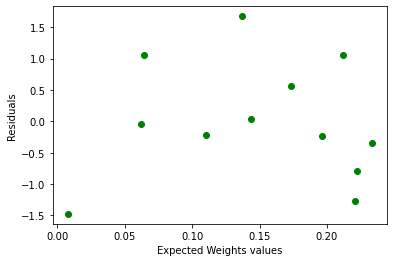

In [22]:
plt.scatter(y_hat,residuals2,color="green")
plt.xlabel("Expected Weights values")
plt.ylabel("Residuals")

Since the conical spread is removed i.e. the variable variance acroos the plot is removed
## Hence our model is rectified.

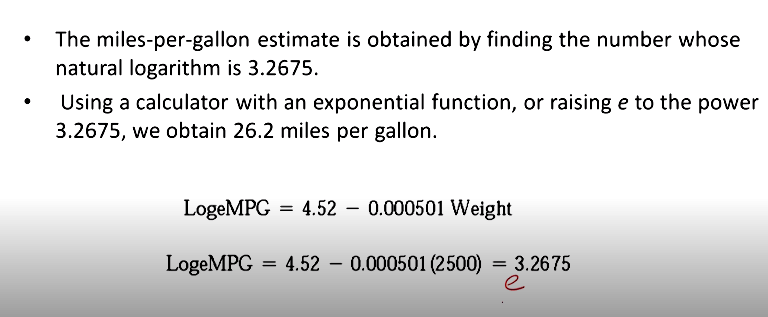